In [1]:
# Analysis of all the unique triplets extracted

In [1]:
import os
import json
import pandas as pd
import numpy as np

In [2]:
def load_and_combine_json(base_path):
    # Initialize an empty list to collect all rows
    rows = []
    # Dictionary to hold disease names, their triplet count, and unique PubMed IDs
    disease_info = {}
    
    # Traverse the directory structure
    for disease in os.listdir(base_path):
        disease_folder = os.path.join(base_path, disease)
        if os.path.isdir(disease_folder):
            json_file_path = os.path.join(disease_folder, 'detailed_post_ontoGPT.json')
            if os.path.exists(json_file_path):
                # Open the JSON file and load the data into a dictionary
                with open(json_file_path, 'r') as file:
                    data = json.load(file)
                
                # Initialize or retrieve the dictionary entry for this disease
                if disease not in disease_info:
                    disease_info[disease] = {'triplet_count': 0, 'unique_pubmed_ids': set()}

                # Process the dictionary to extract triplets
                for entry in data['triplets']:
                    triplet = entry['triplet']
                    sources = entry['source']
                    # Extract PubMed IDs and count titles and abstracts
                    pubmed_ids = []
                    title_count = 0
                    abstract_count = 0
                    for pid, details in sources.items():
                        pubmed_ids.append(pid)
                        disease_info[disease]['unique_pubmed_ids'].add(pid)  # Store unique PubMed ID
                        if 'title' in details:
                            title_count += 1
                        if 'abstract' in details:
                            abstract_count += 1
                    
                    # Add disease name and source information to the triplet
                    triplet['disease'] = disease  # Add disease name to each triplet
                    triplet['count'] = entry['count']
                    triplet['source'] = pubmed_ids
                    triplet['no_of_titles'] = title_count
                    triplet['no_of_abstracts'] = abstract_count
                    
                    # Append the modified triplet to the list of rows
                    rows.append(triplet)

                    # Increment triplet count for this disease
                    disease_info[disease]['triplet_count'] += 1
    
    # Create DataFrame
    df = pd.DataFrame(rows)

    # Print unique PubMed IDs count per disease and total triplet count per disease
    for disease, info in disease_info.items():
        print(f"{disease}: {len(info['unique_pubmed_ids'])} unique PubMed IDs, {info['triplet_count']} triplets")

    # Optionally, return the dictionary of disease counts
    return df, disease_info

In [4]:

# Usage:
base_path = '../../data'
df, disease_info = load_and_combine_json(base_path)


loeys_dietz_syndrome: 34 unique PubMed IDs, 141 triplets
donnai-barrow_syndrome: 3 unique PubMed IDs, 20 triplets
camurati_engelmann: 13 unique PubMed IDs, 42 triplets
sickle_cell: 1858 unique PubMed IDs, 7236 triplets
celiac_disease: 1842 unique PubMed IDs, 6899 triplets
canavan_disease: 38 unique PubMed IDs, 142 triplets
milroy_disease: 2 unique PubMed IDs, 15 triplets
chediak_higashi_syndrome: 42 unique PubMed IDs, 173 triplets
propionic_acidemia: 47 unique PubMed IDs, 195 triplets
hypochondroplasia: 13 unique PubMed IDs, 41 triplets
marfan_syndrome: 142 unique PubMed IDs, 588 triplets
huntington_disease: 216 unique PubMed IDs, 924 triplets
apert_syndrome: 47 unique PubMed IDs, 219 triplets
citrullinemia: 46 unique PubMed IDs, 197 triplets
brugada_syndrome: 26 unique PubMed IDs, 87 triplets
wilson_disease: 236 unique PubMed IDs, 1047 triplets
lesch_nyhan_syndrome: 46 unique PubMed IDs, 166 triplets
noonan_syndrome: 114 unique PubMed IDs, 431 triplets
alkaptonuria: 35 unique PubMed I

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18802 entries, 0 to 18801
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   maxo                18802 non-null  object
 1   maxo_label          18802 non-null  object
 2   non_grounded_maxo   18802 non-null  object
 3   potential_maxo      18802 non-null  object
 4   relationship        18802 non-null  object
 5   hpo                 18802 non-null  object
 6   hpo_label           18802 non-null  object
 7   non_grounded_hpo    18802 non-null  object
 8   potential_hpo       18802 non-null  object
 9   mondo               18802 non-null  object
 10  mondo_label         18802 non-null  object
 11  non_grounded_mondo  18802 non-null  object
 12  potential_mondo     18802 non-null  object
 13  maxo_qualifier      18802 non-null  object
 14  chebi               18802 non-null  object
 15  hpo_extension       18802 non-null  object
 16  disease             18

In [6]:
df.head()

,maxo,maxo_label,non_grounded_maxo,potential_maxo,relationship,hpo,hpo_label,non_grounded_hpo,potential_hpo,mondo,...,non_grounded_mondo,potential_mondo,maxo_qualifier,chebi,hpo_extension,disease,count,source,no_of_titles,no_of_abstracts
0,None,,cerebral angiography,"[{'id': 'MAXO:0001259', 'label': 'angiography'}]",treats,hp:0002138,subarachnoid hemorrhage,None,[],mondo:0018954,...,None,[],,,,loeys_dietz_syndrome,2,"[24395868, 24431245]",2,2
1,None,,cerebral arterial angioplasty,"[{'id': 'MAXO:0000573', 'label': 'ART'}]",treats,None,,proximal vasospasm,"[{'id': 'HP:0012840', 'label': 'Proximal'}, {'...",mondo:0018954,...,None,[],,,severe,loeys_dietz_syndrome,2,"[24395868, 24431245]",2,2
2,None,,endovascular coil embolization,[],treats,None,,basilar tip aneurysm,"[{'id': 'HP:0002617', 'label': 'Aneurysm'}]",mondo:0018954,...,None,[],,,,loeys_dietz_syndrome,2,"[24395868, 24431245]",2,2
3,None,,intra-arterial vasodilator treatment,"[{'id': 'MAXO:0000573', 'label': 'ART'}]",treats,hp:0025637,vasospasm,None,[],mondo:0018954,...,None,[],,chebi:35620,proximal,loeys_dietz_syndrome,2,"[24395868, 24431245]",2,2
4,maxo:0010319,ct angiogram,None,[],treats,None,,severe proximal vasospasm,"[{'id': 'HP:0012828', 'label': 'Severe'}, {'id...",mondo:0018954,...,None,[],,,,loeys_dietz_syndrome,2,"[24395868, 24431245]",2,2


In [7]:
# Stept 2: Counting all the NANs

# Assuming df is your DataFrame
df = df.replace(['None'], np.nan)

# Replace empty lists with NaN in columns that can contain lists
for column in df.columns:
    df[column] = df[column].apply(lambda x: np.nan if x == [] else x)



In [8]:

# Total sum of titles and abstracts
total_titles = df['no_of_titles'].sum()
total_abstracts = df['no_of_abstracts'].sum()

# Count of unique values in maxo, hpo, mondo
unique_maxo = df['maxo'].nunique()
unique_hpo = df['hpo'].nunique()
unique_mondo = df['mondo'].nunique()

# Count of total values in maxo, hpo, mondo 
total_maxo = df['maxo'].count()
total_hpo = df['hpo'].count()
total_mondo = df['mondo'].count()


# Total count of non-grounded ontologies
non_grounded_columns = [col for col in df.columns if 'non_grounded' in col]
total_non_grounded = df[non_grounded_columns].notna().sum().sum()

# Total count of potential ontologies identified
potential_columns = [col for col in df.columns if 'potential' in col]
total_potential = df[potential_columns].notna().sum().sum()


# Count non-null values in non-grounded columns for maxo, hpo, mondo
non_grounded_maxo_count = df['non_grounded_maxo'].notna().sum()
non_grounded_hpo_count = df['non_grounded_hpo'].notna().sum()
non_grounded_mondo_count = df['non_grounded_mondo'].notna().sum()

# Count non-null values in potential columns for maxo, hpo, mondo
potential_maxo_count = df['potential_maxo'].notna().sum()
potential_hpo_count = df['potential_hpo'].notna().sum()
potential_mondo_count = df['potential_mondo'].notna().sum()



# Output results
print("Total number of titles:", total_titles)
print("Total number of abstracts:", total_abstracts)
print("Unique MAXO values:", unique_maxo)
print("Total MAXO values:", total_maxo)
print("Unique HPO values:", unique_hpo)
print("Total HPO values:", total_hpo)
print("Unique MONDO values:", unique_mondo)
print("Total MONDO values:", total_mondo)
print("Total non-grounded ontologies:", total_non_grounded)


print("Non-grounded MAXO count:", non_grounded_maxo_count)
print("Non-grounded HPO count:", non_grounded_hpo_count)
print("Non-grounded MONDO count:", non_grounded_mondo_count)

print("Total potential ontologies identified:", total_potential)
print("Potential MAXO count:", potential_maxo_count)
print("Potential HPO count:", potential_hpo_count)
print("Potential MONDO count:", potential_mondo_count)



Total number of titles: 19182
Total number of abstracts: 19182
Unique MAXO values: 172
Total MAXO values: 1767
Unique HPO values: 649
Total HPO values: 3688
Unique MONDO values: 352
Total MONDO values: 11866
Total non-grounded ontologies: 39085
Non-grounded MAXO count: 17035
Non-grounded HPO count: 15114
Non-grounded MONDO count: 6936
Total potential ontologies identified: 15440
Potential MAXO count: 5130
Potential HPO count: 4885
Potential MONDO count: 5425


### Results Visualization 

In [9]:
!pip install matplotlib

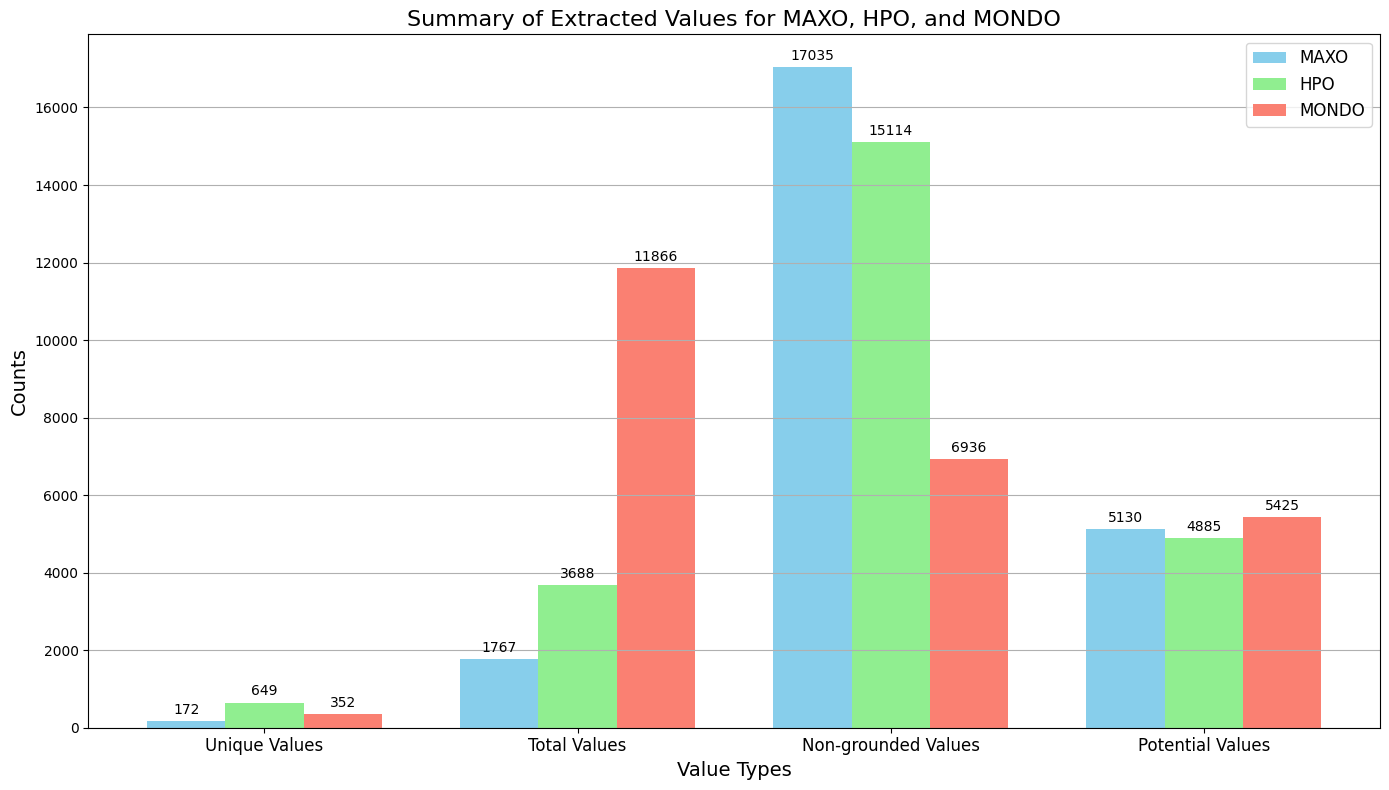

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['Unique Values', 'Total Values', 'Non-grounded Values', 'Potential Values']
maxo_values = [172, 1767, 17035, 5130]
hpo_values = [649, 3688, 15114, 4885]
mondo_values = [352, 11866, 6936, 5425]

# Bar width and positions
bar_width = 0.25
index = np.arange(len(labels))

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Creating bars with data labels
bars1 = ax.bar(index - bar_width, maxo_values, width=bar_width, label='MAXO', color='skyblue')
bars2 = ax.bar(index, hpo_values, width=bar_width, label='HPO', color='lightgreen')
bars3 = ax.bar(index + bar_width, mondo_values, width=bar_width, label='MONDO', color='salmon')

# Adding data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Labels and title with increased font size
ax.set_xlabel('Value Types', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_title('Summary of Extracted Values for MAXO, HPO, and MONDO', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=12)

# Grid for better readability
ax.yaxis.grid(True)

# Show plot
plt.tight_layout()
plt.show()
